In [1]:
# Import libraries
# Name: Kasturi Dash
# Student number: 20428659

# BMIF 804 - Assignment 3

# Importing libraries
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the ultrasound image and segmentation mask
ultrasound_img = sitk.ReadImage("prostate_ultrasound.mha")
segmentation_mask = sitk.ReadImage("prostate_segment.mha")

In [3]:
'''The image_Info() functions below take an input image object
   and print important attributes of the image (size, spacing, origin, direction, and pixel type)'''
def image_Info_ultra(ultrasound_img):
    ultrasound_size = ultrasound_img.GetSize()
    ultrasound_spacing  = ultrasound_img.GetSpacing()
    ultrasound_origin = ultrasound_img.GetOrigin()
    ultrasound_direction = ultrasound_img.GetDirection()
    ultrasound_pixel_type = ultrasound_img.GetPixelIDTypeAsString()

    ultra_dict = {
        "Size": ultrasound_size,
    "Spacing": ultrasound_spacing,
    "Origin": ultrasound_origin,
    "Direction": ultrasound_direction,
    "Pixel Type": ultrasound_pixel_type
    }
    
    
    for key, value in ultra_dict.items():
        print(key + ":", value)

    
    return ultra_dict


ultrasound_info = image_Info_ultra(ultrasound_img)

Size: (512, 10048, 1)
Spacing: (0.09, 0.003, 1.0)
Origin: (0.0, 0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


In [4]:
# Calculating physical extent for ultrasound image (prostate_ultrasound.mha)
ultrasound_extent = [ultrasound_info["Size"][i] * ultrasound_info["Spacing"][i] for i in range(len(ultrasound_info["Size"]))]

print(ultrasound_extent)

[46.08, 30.144000000000002, 1.0]


In [5]:
def image_Info_seg(segmentation_mask):
    segmentation_size = segmentation_mask.GetSize()
    segmentation_spacing  = segmentation_mask.GetSpacing()
    segmentation_origin = segmentation_mask.GetOrigin()
    segmentation_direction = segmentation_mask.GetDirection()
    segmentation_pixel_type = segmentation_mask.GetPixelIDTypeAsString()

    seg_dict= {
        "Size": segmentation_size,
    "Spacing": segmentation_spacing,
    "Origin": segmentation_origin,
    "Direction": segmentation_direction,
    "Pixel Type": segmentation_pixel_type
    }
    
    
    for key, value in seg_dict.items():
        print(key + ":", value)

    
    return seg_dict


segmentation_info = image_Info_seg(segmentation_mask)

Size: (512, 10048, 1)
Spacing: (0.09, 0.003, 1.0)
Origin: (0.0, 0.0, 0.0)
Direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type: 8-bit unsigned integer


In [6]:
# Calculating physical extent for segment image (prostate_segment.mha)
segmentation_extent = [segmentation_info["Size"][i] * segmentation_info["Spacing"][i] for i in range(len(segmentation_info["Size"]))]

print(segmentation_extent)

[46.08, 30.144000000000002, 1.0]


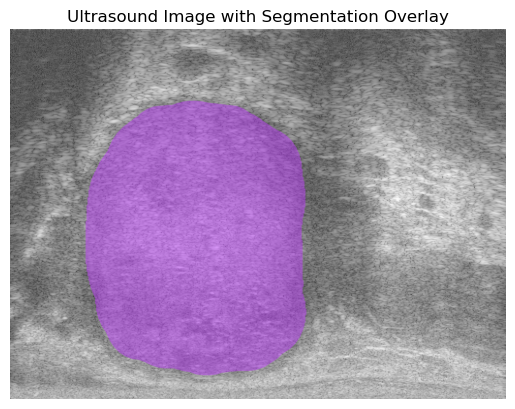

In [156]:
overlay = sitk.LabelOverlay(ultrasound_img, segmentation_mask)

# Converting overlay image to a NumPy array for visualization
segmentation_array = sitk.GetArrayFromImage(segmentation_mask)

plt.imshow(sitk.GetArrayFromImage(overlay[:, :, slice_no]), cmap='gray', aspect='auto')
plt.title('Ultrasound Image with Segmentation Overlay')
plt.axis('off')
plt.show()


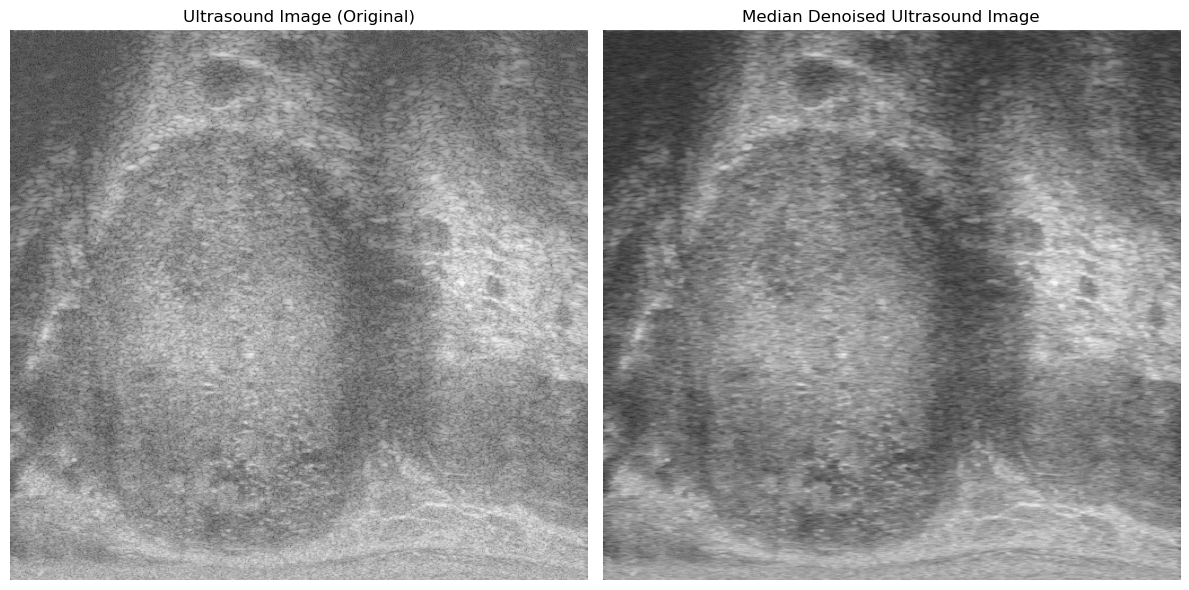

In [106]:
# Reading ultrasound image
ultrasound_img = sitk.ReadImage("prostate_ultrasound.mha")

# Inputting the slice number to visualize
slice_no = 0  

# Median filter object
median_filter = sitk.MedianImageFilter()


radius = 2
median_filter.SetRadius(radius)

# Applying the median filter to ultrasound image
ultrasound_output_img = median_filter.Execute(ultrasound_img[:, :, slice_no])

ultrasound_array = sitk.GetArrayFromImage(ultrasound_img[:, :, slice_no])
ultrasound_output_array = sitk.GetArrayFromImage(ultrasound_output_img)


# Visualizing and comparing original and median images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ultrasound_array, cmap='gray', aspect='auto')
plt.axis('off')
plt.title('Ultrasound Image (Original)')

plt.subplot(1, 2, 2)
plt.imshow(ultrasound_output_array, cmap='gray', aspect='auto')
plt.axis('off')
plt.title('Median Denoised Ultrasound Image')

plt.tight_layout()
plt.show()



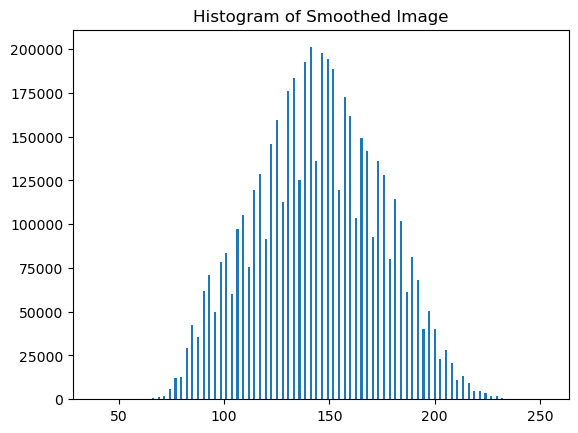

In [154]:
# Visualizing histogram of smoothed image

flatten_array_smooth = ultrasound_output_array.flatten()
plt.hist(flatten_array_smooth, bins=80, width=1)
plt.title("Histogram of Smoothed Image")
plt.show()

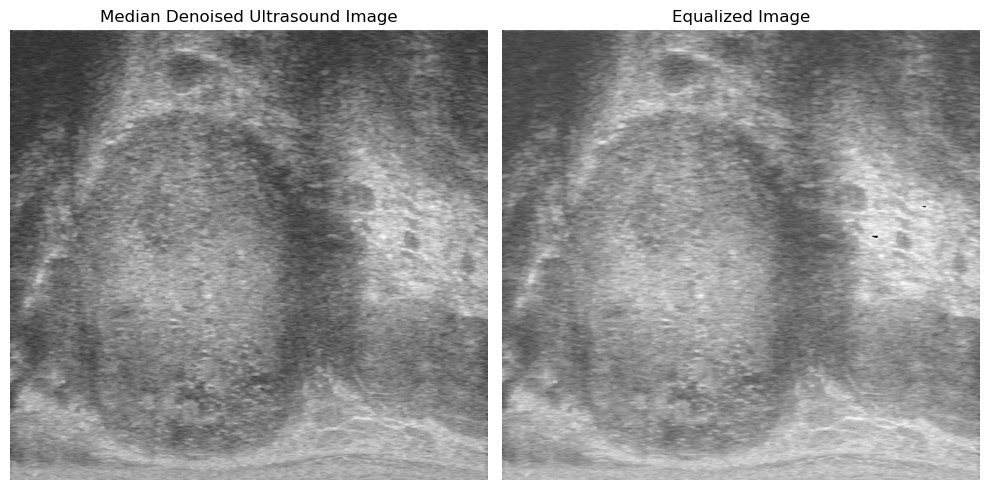

In [133]:
# Applying AdaptiveHistogramEqualizationImageFilter
hist_equalizer = sitk.AdaptiveHistogramEqualizationImageFilter()

# Setting parameters (alpha and beta) of hist_equalizer function
hist_equalizer.SetAlpha(1)
hist_equalizer.SetBeta(1.2)

# Applying histogram equalization to the smoothed image
equalized_img = hist_equalizer.Execute(ultrasound_output_img)

equalized_array = sitk.GetArrayFromImage(equalized_img)

# Visualizing and comparing the equalized and median images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ultrasound_output_array, cmap='gray', aspect='auto')
plt.axis('off')
plt.title('Median Denoised Ultrasound Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_array, cmap='gray', aspect='auto')
plt.axis('off')
plt.title('Equalized Image')


plt.tight_layout()
plt.show()

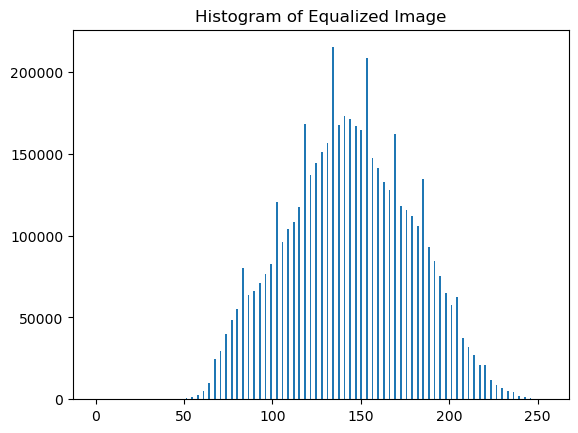

In [155]:
# Visualizing histogram of equalized image

flatten_array_equal = equalized_array.flatten()
plt.hist(flatten_array_equal, bins=80, width=1)
plt.title("Histogram of Equalized Image")
plt.show()

In [136]:
# Saving enhanced image of prostate

# Saving filename
equalized_img_filename = "prostate_enhanced.mha"

# Saving equalized image as an MHA file
sitk.WriteImage(equalized_img, equalized_img_filename)

# Range of intensities within prostate
Range: 68-316

# 4 fiducial points:

F_15_1: (104, 2938, 0),

F_4_1: (279, 2938, 0),

F_20_1: (104, 8863, 0),

F_8_1: (289, 8917, 0)

# Screenshot (Red View)

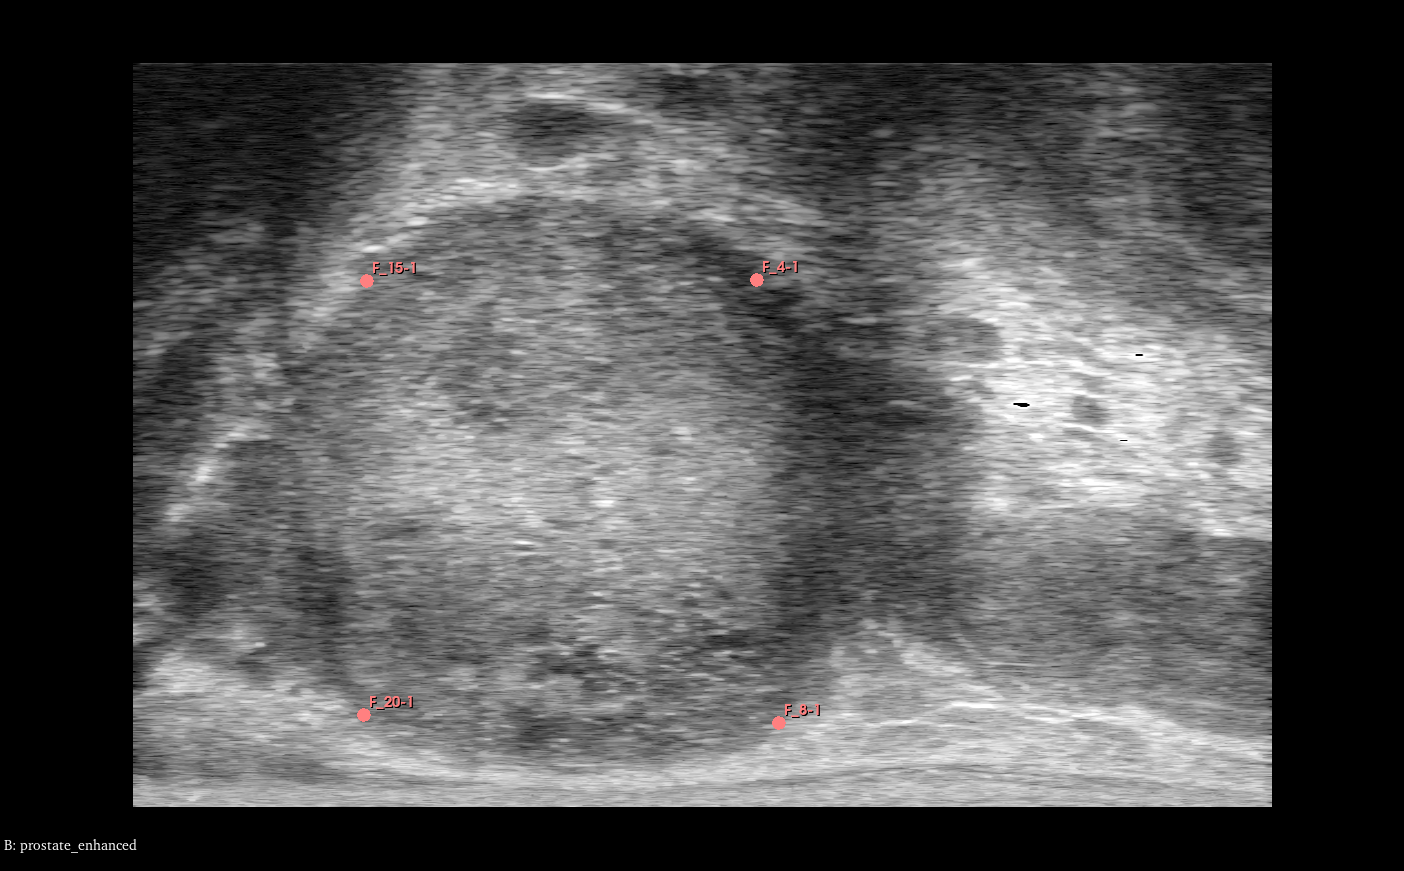

In [157]:
# Reading the reference segmentation mask
reference_segmentation = sitk.ReadImage("prostate_segment.mha")

# Applying ConfidenceConnected filter
confidence_connected = sitk.ConfidenceConnectedImageFilter()

# Setting parameters for the ConfidenceConnected filter
confidence_connected.SetNumberOfIterations(5)
confidence_connected.SetMultiplier(3.5)
confidence_connected.SetInitialNeighborhoodRadius(3)
confidence_connected.SetReplaceValue(1)

# Defining different seed points
seed_points = [
    (100, 100, 10),
    (200, 200, 20),
    (300, 300, 30),
]

# Applying region growing segmentation for each seed point and visualize the results
plt.figure(figsize=(15, 5))

for i, seed_point in enumerate(seed_points):
    # Setting the seed point for the ConfidenceConnected filter
    confidence_connected.SetSeed(seed_point)

    # Applying region growing segmentation
    segmented_img = confidence_connected.Execute(enhanced_img)

    # Converting segmented image to a NumPy array
    segmented_array = sitk.GetArrayFromImage(segmented_img)

    # Visualizing segmented image
    plt.subplot(1, len(seed_points), i+1)
    plt.imshow(segmented_array, cmap='gray')
    plt.axis('off')
    plt.title("Seed Point: {}".format(seed_point))

plt.tight_layout()
plt.show()

AttributeError: 'ConfidenceConnectedImageFilter' object has no attribute 'SetSeed'

<Figure size 1500x500 with 0 Axes>

In [143]:
# Calculating area of prostate cross-section (in mm²)

# Creating reference image of segmentation mask
reference_segmentation = sitk.ReadImage("prostate_segment.mha")

pixel_spacing = reference_segmentation.GetSpacing()

segmentation_array = sitk.GetArrayFromImage(segmentation_mask)
num_pixels = len(segmentation_array[segmentation_array > 0])

area= num_pixels * (pixel_spacing[0] * pixel_spacing[1])

print(f"Prostate Cross Section Area: {(area)} mm²")

Prostate Cross Section Area: 389.89836 mm²


In [151]:
# Calculating prostate volume (in CC), assuming c = 35mm

A = 389.89836  
c = 35  

volume = (4/3) * A * c

# Convert volume from mm³ to cc
volume_cc = volume / 1000

print(f"Prostate Volume: {(volume_cc)} cc")


Prostate Volume: 18.1952568 cc


In [150]:
# Calculating mean and standard deviation of all pixel values within prostate region

# Reading the original ultrasound image
ultrasound_img = sitk.ReadImage("prostate_ultrasound.mha")

# Getting pixel values of the original ultrasound image
ultrasound_array = sitk.GetArrayFromImage(ultrasound_img)

# Calculating the mean and standard deviation 
mean = np.mean(ultrasound_array)
std= np.std(ultrasound_array)

print(f"Mean Intensity: {mean}")
print(f"Standard Deviation: {std}")

Mean Intensity: 143.40546043055832
Standard Deviation: 32.31622510119849
